<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/2025_1s/TIC/Aula_02_Regressao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/logo_mackenzie_tic_gustavo1.png' width="600">

# **Regressão Logística**

A regressão logística é um modelo estatístico utilizado para modelar a probabilidade de ocorrência de um evento ou resultado, especialmente em situações binárias, onde a variável de saída pode ter apenas dois valores possíveis.

As variáveis explicativas em um modelo de regressão logística são aquelas que são usadas para prever a variável de saída binária. Elas são chamadas de variáveis independentes, preditoras ou explicativas. É normal também chamarmos tais variáveis de "dados de entrada". No contexto da regressão logística, essas variáveis podem ser numéricas ou categóricas e são utilizadas para calcular a probabilidade de ocorrência do evento de interesse.

Por exemplo, se estivermos analisando a probabilidade de um cliente comprar um produto (evento = compra), as variáveis explicativas podem incluir informações como idade, sexo, renda, histórico de compras anteriores, entre outros. Essas variáveis ajudarão a modelar como cada uma delas influencia a probabilidade de compra.

Os modelos de regressão logística são particularmente úteis em problemas de classificação, onde se deseja estimar em qual categoria os dados devem ser classificados. Como possíveis aplicações pode-se citar as seguintes áreas:
<br>
<br>

**Médica:** Determinar as chances de se desenvolver uma determinada doença, baseado em caracteristicas gerais do paciente.

**Financeira:** Determinar se um empréstimo pode ser concedido a um cliente ou não.

**Social:** Estimar as chances de uma pessoa votar em um candidato ou não.

**Industrial:** Estimar as chances de falhas em processos produtivos.

**Marketing:** Estimar as chances de um cliente adquirir um determinado produto ou pacote de serviços.

## Exemplo

Suponha que se deseja analisar as chances de um indivíduo ter problemas cardiovascular. Existem diversos fatores que influenciam este problema, mas para este exemplo vamos considerar apenas um: o nível de colesterol ruim no sangue (LDL). Considere que um determinado hospital possui uma base de dados com 100 pessoas, seus níveis de LDL, e também se sofrem de alguma doença cardiovascular.

A variável dependente (saída do modelo) é a ocorrencia de doença cardiovascular. Ter doença cardiovascular é igual a 1 e não ter é igual a 0. A variável independente é o nível de LDL na sangue.



## O que acontece se usarmos a Regressão Linear?

O *Scatterplot* abaixo mostra a aplicação da Regressão Linear em um dado sintético (gerado aleatoriamente) acerca de níveis de LDL e a presença (ou ausência) de doenças cardiovasculares.

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_regr_logistica_fit_linear.png'>

Embora a Reressão Linear possa ser usada para decidir sobre a presença ou não da doença (dizendo, por exemplo, que classificaremos como tendo a doença se o LDL for maior que 130 - sendo este o limiar de decisão), temos alguns problemas:

- Um modelo linear não tem como saída probabilidades. Ele trata os valores (classes) o e 1 como números a serem preditos e ajusta a reta minimizando o erro entre os pontos reais e o estimado. Então, o resultado não pode ser interpretado como probabilidade.

- Um modelo linear também extrapola os limitantes inferior e superior, resultando em valores menores que 0 ou maiores que 1. Isso não faz sentido no contexto da classificação.

- Como o resultado predito é uma interpolação linear entre pontos, o limiar de decisão não tem muito sentido para diferenciar uma classe de outra. Ele faria mais sentido se fosse probabilidades.



## A Regressão Logística como ferramenta para problemas de classificação

Nesse exmplo, o que a Regressão Logística se propõe a fazer é a criação de um modelo logístico que possa estimar a probabilidade de um individuo ter doença cardiovascular, baseado em seu nível de LDL. Sendo assim, ao invés de ajustar uma reta (ou hiperplano), a Regressão Logísica usa a função logística (ou sigmóide) para ajustar a saída do modelo no intervalo [0,1].

Para um valor de $x$, a função logística é dada por:

$$logistic(x) = \frac{1}{1+\exp(-x)},$$

onde $exp(\cdot)$ é a função exponencial. Veja abaixo como é o formato dessa curva.

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_regr_logistica_sigmoide.png'>

Note que, quanto maior o valor de $x$, mais a função se aproxima de 1. Por outro lado, quanto menor o valor de $x$, mais a função se aproxima de 0. Mas nunca ultrapassa esses limites.

O modelo da Regressão Logística é de certa forma intuitivo. Lembre-se que na Regressão Linear nós considerávamos que a relação entre as variáveis explicativas a saída do modelo era dada por

$$\hat{y}_i=\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ...+ \beta_r x_{r,i}.$$

No problema de classificação, para adequar o modelo para uma saída na forma de probabilidade (entre 0 e 1), nós consideramos a reta de regressão dentro da função logística. Temos, então, que a probabilidade de uma amostra $i$ ser classificada como sendo da classe 1 é igual a

$$P(y_i = 1) = \hat{y_i} = \frac{1}{1+\exp(-\left( \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ...+ \beta_r x_{r,i} \right))},$$

onde $y_i \in \{0,1\}$ indica a classe verdadeira que a amostra $i$ pertence, $\hat{y_i}$ é a probabilidade da amostra $i$ pertencer à classe 1 e $x_{1,i},...,x_{r,i}$ são as variáveis explicativas. Assumindo um liminar de 0.5, por exemplo, dizemos que a amostra pertence á classe 1 se a probabilidade $\hat{y_i}$ associada for maior que 0.5.

O *Scatterplot* abaixo mostra (em um dado sintético gerado aleatoriamente) a relação entre níveis de LDL e a presença (ou ausência) de doenças cardiovasculares aplicando a função logística.

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_regr_logist.png'>

## Modelo de otimização

Na Regressão Logística, ajustamos os parâmetros do modelo ($\beta_0, \beta_1, \ldots, \beta_r$) por meio da medida de dissimilaridade baseada na entropia cruzada. Seja $y_i$ o rótulo verdadeiro da amostra $i$ e $\hat{y}_i$ a probabilidade obtida pelo modelo de Regressão Logística. O complemento de $y_i$ é dado por $1 - y_i$ e o complemento de $\hat{y}_i$ é dado por $1 - \hat{y}_i$. A entropia cruzada é dada por

$$H(y_i,\hat{y}_i) = - \left[y_i \log\hat{y}_i + (1 - y_i) \log(1 - \hat{y}_i) \right].$$

Para formular o modelo de otimização para ajustar os parâmetros da Regressão Logística, minimizamos a média da soma das entropias cruzadas de todas as amostras do conjunto de dados de treinamento. O problema de otimização é o seguinte:

$$\min_{\beta_0, \beta_1, \ldots, \beta_r} -\frac{1}{n} \sum_{i=1}^{n} \left[y_i \log\hat{y}_i + (1 - y_i) \log(1 - \hat{y}_i) \right], $$

onde
$$\hat{y_i} = \frac{1}{1+\exp(-\left( \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ...+ \beta_r x_{r,i} \right))}.$$

A resolução desse problema é, normalmente, obtida a partir do método do gradiente.

## *Odds* (Chance)

Com a probabilidade calculada, pode-se calcular também as chances de ocorrência de um evento.

No exemplo anterior, se o modelo preve que uma pessoa com nível de LDL de 135 tem a probabilidade de **p= 0,8** (80%) de desenvolver problemas cardiovasculares, então podemos dizer que essa pessoa tem a probabilidade de **1-p = 0,2** (20%) de não ter esse problema.

A chance é definida como:
<br>
<br>
$$ Chance = p/(1-p)$$ nesse caso, $$Chance = 0,8/0,2$$ $$Chance = 4$$
<br>
O que significa uma pessoa nessas condições tem 4x mais chances de desenvolver uma doença cardiovascular do que de não desenvolver.

## Interpretando os parâmetros

Na Regressão Linear, a interpretação dos parâmetros era clara. O aumento em uma unidade de $x_j$ levava a um aumento de $\beta_j$ unidades no valor predito. No entanto, a interpretação na Regressão Logística não é tão clara.

Voltando às chances mencionadas anteriromente (também chamada de *odds*), temos que

$$odds = \frac{P(y = 1)}{P(y = 0)} = \frac{P(y = 1)}{1 - P(y = 1)} = \exp\left( \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + ...+ \beta_r x_{r} \right).$$

Para avaliar o que acontece com o aumento em uma unidade de $x_j$, olhamos para a razão entre duas predições:

$$\frac{odds_{x_j + 1}}{odds_{x_j}} = \frac{\exp\left( \beta_0 + \beta_1 x_{1} + \ldots + \beta_j (x_{j} + 1) + ...+ \beta_r x_{r} \right)}{\exp\left( \beta_0 + \beta_1 x_{1} + \ldots + \beta_j x_{j} + ...+ \beta_r x_{r} \right)} = \exp( \beta_j (x_{j} + 1) - \beta_j x_{j}) = \exp( \beta_j ).$$

A interpretação que temos é a seguinte. O aumento em uma unidade de $x_j$ altera a *odds* por um fator de $\exp( \beta_j )$. Por exemplo, se você tem uma *odds* igual a dois (ou seja, a probabilidade da amostra ser classificada como da classe 1 é duas vezes a probabilidade de ser classificada como da classe 0) e se $\beta_j = 0.7$, o aumento em uma unidade de $x_j$ multiplica a *odds* por aproximadamente 2, alterando para 4.

## Comparativo

**Regressão linear**


*   Variáveis contínuas
*   Resolve problemas de regressão
*   Função é uma reta
*   A interpretação dos coeficientes se dá no valor predito

**Regressão logistica**


*   Variável resposta categórica
*   Resolve problemas de classificação
*   Função logística (ou sigmóide)
*   A interpretação dos coeficientes se dá no *odds*

## Uma regressão logística simples

Vamos começar com uma regressão simples apenas para você se familiarizar com a construção do modelo.

In [30]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")

Lendo uma amostra de 5 notas, de diferentes alunos.

In [31]:
notas = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_exemplo_notas_reglog2.csv", sep=',')
notas

,Notas
0,5.5
1,7.2
2,6.0
3,5.4
4,4.2


Vamos definir o critério de aprovação/reprovação em 6, mas o modelo **não** vai ter acesso a esse número. Na verdade, o modelo deve ser capaz de observar os dados e entender o critério que foi adotado.

In [32]:
notas_lista = notas['Notas'].to_list()
situacao = []
for nota in notas_lista:
    if nota>=6.0:
        situacao.append('aprovado')
    else:
        situacao.append('reprovado')

print(situacao)

['reprovado', 'aprovado', 'aprovado', 'reprovado', 'reprovado']


In [33]:
notas['Situação'] = pd.DataFrame({'Situação':situacao})
notas

,Notas,Situação
0,5.5,reprovado
1,7.2,aprovado
2,6.0,aprovado
3,5.4,reprovado
4,4.2,reprovado


In [34]:
# import da ferramenta
from sklearn.linear_model import LogisticRegression

# Inicializar o modelo com parametros padrão
logreg = LogisticRegression()

# ajusta o modelo com as informacoes
logreg.fit(notas[['Notas']],notas['Situação'])

LogisticRegression()

Vamos agora analisar 100 novas nota, de novos alunos, e verificar se o nosso modelo é capaz de determinar quais deles devem ser aprovados e quais não.

In [35]:
novosAlunos = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_exemplo2_notas_reglog2.csv", sep=',')

#utiliza o modelo para prever a situação dos novos alunos
y_pred=logreg.predict(novosAlunos)

#acrescenta uma coluna no df, para representar a situacao prevista dos novos alunos
novosAlunos['Previsao'] = y_pred

novosAlunos

,Notas,Previsao
0,6.5,aprovado
1,4.4,reprovado
2,8.9,aprovado
3,9.6,aprovado
4,3.8,reprovado
...,...,...
95,6.8,aprovado
96,2.7,reprovado
97,7.4,aprovado
98,9.6,aprovado


Vamos visualizar o limiar de decisão criado pelo modelo ajustado.

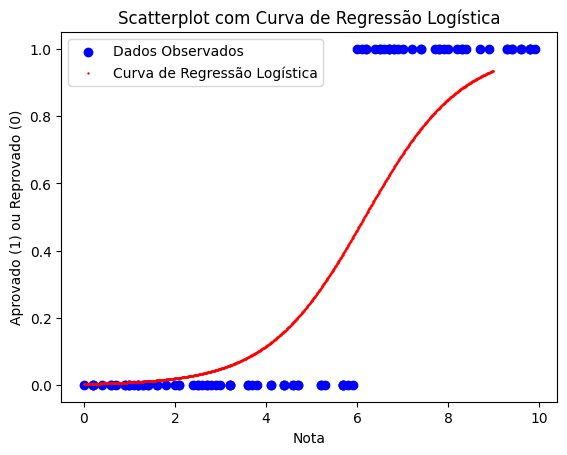

In [36]:
# prevendo os valores
valores = np.arange(int(novosAlunos.Notas.min()),int(novosAlunos.Notas.max()),0.01).reshape(-1, 1)
df_predicted_prob = pd.DataFrame({'predicted_probabilities': logreg.predict_proba(valores)[:,0]})

# Scatterplot com Reta de Regressão
situacao_classe = []
for nota in novosAlunos.Notas:
    if nota>=6.0:
        situacao_classe.append(1)
    else:
        situacao_classe.append(0)

plt.scatter(novosAlunos.Notas, situacao_classe, color='blue', label='Dados Observados')
plt.scatter(valores, df_predicted_prob.predicted_probabilities, color='red', label='Curva de Regressão Logística', marker='.', s=2)

plt.xlabel('Nota')
plt.ylabel('Aprovado (1) ou Reprovado (0)')
plt.title('Scatterplot com Curva de Regressão Logística')
plt.legend()
plt.show()


Vamos ver as probabilidades associadas a cada nota.

In [37]:
novosAlunos['Probabilidade'] = pd.DataFrame(logreg.predict_proba(novosAlunos[['Notas']])[:,0])
novosAlunos

,Notas,Previsao,Probabilidade
0,6.5,aprovado,0.578748
1,4.4,reprovado,0.159394
2,8.9,aprovado,0.929624
3,9.6,aprovado,0.962350
4,3.8,reprovado,0.097214
...,...,...,...
95,6.8,aprovado,0.645782
96,2.7,reprovado,0.036759
97,7.4,aprovado,0.762488
98,9.6,aprovado,0.962350


Mas será que o modelo funcionou bem? Vamos contar quantas vezes ele errou.

In [38]:
# erro tipo 1
falso_positivo = len(novosAlunos[(novosAlunos['Notas']<6) & (novosAlunos['Previsao']=='aprovado') ])

# erro tipo 2
falso_negativo = len(novosAlunos[(novosAlunos['Notas']>=6) & (novosAlunos['Previsao']=='reprovado') ])

verdadeiro_positivo = len(novosAlunos[(novosAlunos['Notas']>=6) & (novosAlunos['Previsao']=='aprovado') ])
verdadeiro_negativo = len(novosAlunos[(novosAlunos['Notas']<6) & (novosAlunos['Previsao']=='reprovado') ])

acertos = verdadeiro_positivo + verdadeiro_negativo
erros = falso_positivo + falso_negativo

print('Erros   : ', erros)
print('Acertos : ',acertos)
print('--------')
print('Porcentagem de acertos : ', acertos/(acertos+erros))

Erros   :  2
Acertos :  98
--------
Porcentagem de acertos :  0.98


Lembre-se, tudo o que modelo tinha para tomar a decisão, eram 5 valores apenas!
<br>
<br>
Mas **Cuidado**, os modelos de regressão logística podem não ser assim tão eficientes... No caso, utilizamos um exemplo simples onde a variável dependente ('situação') é determinada com base em uma única variável independente ('nota'), e o critério é o de que essa variável deve ser maior que um determinado valor.
Esse exemplo, além de simples, também beneficia o modelo já que este utiliza por padrão, uma equação que se encaixa perfeitamente nesse tipo de situação.

## Examplo: Conjunto de dados Banknote Authentication

Vamos agora usar um conjunto de dados, chamado [Banknote Authentication](https://archive.ics.uci.edu/dataset/267/banknote+authentication) para avaliar o desempenho do uso da Reressão Logística como método classificador. O objetivo desse conjunto de dados é construir uma inteligência computacional capaz de identificar cédulas bancárias como autênticas (classe 1) ou falsas (classe 0). A coluna `authentic` indica se as cédulas são ou não autênticas. As demais colunas (variáveis de entrada) correspondem a medidas estatísticas extraídas das imagens das cédulas. Ou seja, aqui estamos em um cenário em imagens foram coletadas e (parte das) informações presentes nelas foram convertidas para dados tabulares. Isso é muito comum, uma vez que dados tabulares são geralmente mais fáceis de trabalhar em compração com dados de imagens.

Veja na sequência os dados coletados.

In [39]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_banknotes.csv", sep=',')
df.head()

,variance,skewness,kurtosis,entropy,authentic
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Para uma primeira construção do modelo, vamos considerar apenas a variável *variance* para prever a autenticidade da cédula.

Para isso, o primeiro passo vai ser separar os dados de entrada dos dados de saída.

In [40]:
# Separando dados de entrada e de saída

X = df['variance']
y = df['authentic']

Em seguida, vamos separar os dados (tanto de entrada quanto de saída) em treinamento e teste. Lembre-se que os dados de treinamento serão utilizados para construir o modelo e os dados de teste para avaliar seu desempenho. Vamos considerar 20% para teste e estratificando em relação ao vetor de saída. Use como semente o valor 101.

In [41]:
from sklearn.model_selection import train_test_split # Função que separa os dados em treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1097,) (1097,)
(275,) (275,)


Agora, podemos contruir o modelo e aplicá-lo nos dados que foram separados para teste.

In [42]:
from sklearn.linear_model import LogisticRegression # Função que constrói o modelo de regressão logística

# Construção do modelo

logreg = LogisticRegression() # Definimos o objeto que guardará o modelo de regressão logística
logreg.fit(pd.DataFrame(X_train),y_train) # Treinamento do modelo. Note que, aqui, foi necessário converter os dados de entrada para um DataFrame uma vez que usamos apenas uma variável. Se tivessem mais, não precisaria dessa etapa.

# Fazendo as previsões

y_pred = logreg.predict(pd.DataFrame(X_test))

Agora vamos verificar a qualidade do modelo através da medida de acurácia. O Python já tem a função pronta para calcular os elementos (verdadeiro/falso positivo/negativo) usados no cálculo dessa métrica.

In [43]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[135,  18],
       [ 20, 102]])

A célula anterior calculou e apresentou a matrix de confusão, que pode ser interpretada como:

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_matriz_confusao.png'>


Note que na matriz de confusão apresentada pelo Python, não fica claro qual a classe tida como verdadeira e qual a classe tida como falsa. O Python não vai discriminar essa definição apenas com base nos dados passados na construção do modelo. Então, para deixar mais claro os resultados obtidos, é interessante utilizar a função `ConfusionMatrixDisplay`, como descrito no código abaixo.

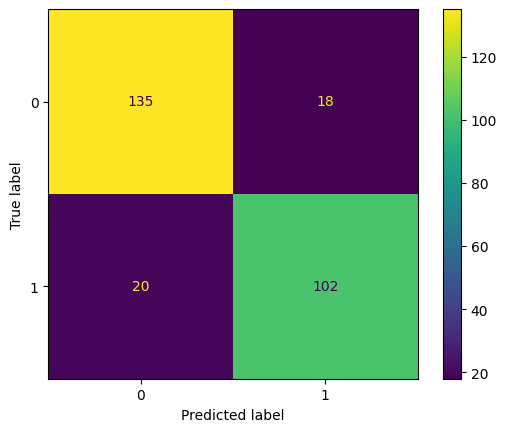

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = metrics.confusion_matrix(y_test, y_pred, labels=logreg.classes_) # logreg.classes_ pega as classes contidas no modelo treinado logreg (logreg é o nome do objeto, ou seja, poderia ser outro nome que tenha escolhido)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

disp.plot()
plt.show()

Veja que a classe 0 foi assumida como a `verdadeira` e a classe `1` como falsa. Isso aconteceu porque no Python essa atribuição se dá pela ordem alfabética ou numérica das classes. Mas, em todo caso, ser a classe verdadeira ou a classe falsa não importa, pois o que devemos levar em conta são os resultados obtidos para cada classe.

Veja abaixo como extrair os resultados da matriz de confusão e calcular quantos foram os erros, os acertos e a acurácia.

In [45]:
verdadeiro_positivo = cnf_matrix[0][0]
verdadeiro_negativo = cnf_matrix[1][1]

falso_positivo = cnf_matrix[0][1]
falso_negativo = cnf_matrix[1][0]

acertos = verdadeiro_positivo + verdadeiro_negativo
erros = falso_positivo + falso_negativo

print('Erros   : ', erros)
print('Acertos : ',acertos)
print('--------')
print('Porcentagem de acertos (acurácia): ', acertos/(acertos+erros))

Erros   :  38
Acertos :  237
--------
Porcentagem de acertos (acurácia):  0.8618181818181818


Também há uma função em Python que calcula diretamente a acurácia, sem a necessidade de escrever as operações. Veja essa função no código abaixo.

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8618181818181818

Também podemos utilizar o modelo para consultar a probabilidade das cédulas serem classificada como autênticas ou falsas, utilizando `logmodel.predict_proba`. Via de regra, os modelos criados em Python assumem 0,5 como o limiar de decisão para classificar como sendo da classe 0 (probabilidade até 0,5) ou da classe 1 (probabilidade maior que 0,5).

In [47]:
y_pred_prob = logreg.predict_proba(pd.DataFrame(df['variance']))

p_autentica = []
p_falsa = []

for linha in y_pred_prob:
    p_autentica.append(linha[1]) # Probabilidade de ser autêntica
    p_falsa.append(linha[0]) # Probabilidade de ser falsa

df['p_autentica'] = p_autentica
df['p_falsa'] = p_falsa

df

,variance,skewness,kurtosis,entropy,authentic,p_autentica,p_falsa
0,3.62160,8.66610,-2.8073,-0.44699,0,0.025839,0.974161
1,4.54590,8.16740,-2.4586,-1.46210,0,0.010494,0.989506
2,3.86600,-2.63830,1.9242,0.10645,0,0.020391,0.979609
3,3.45660,9.52280,-4.0112,-3.59440,0,0.030294,0.969706
4,0.32924,-4.45520,4.5718,-0.98880,0,0.409918,0.590082
...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,0.391604,0.608396
1368,-1.38870,-4.87730,6.4774,0.34179,1,0.792416,0.207584
1369,-3.75030,-13.45860,17.5932,-2.77710,1,0.975441,0.024559
1370,-3.56370,-8.38270,12.3930,-1.28230,1,0.970594,0.029406


Agora, vamos repetir os passos anteriores para criar o modelo de Regressão Logística, mas agora usando todas as variáveis preditoras. Considere os mesmos parâmetros (semente 101 e 20% dos dados para teste).

In [48]:
# Lendo os dados novamente (nos códigos anteriores criamos colunas que não fazem parte dos dados)

df = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_banknotes.csv", sep=',')
df.head()

,variance,skewness,kurtosis,entropy,authentic
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [49]:
# Separando os dados de treinamento e teste

X = df.drop('authentic', axis=1)
y = df.authentic

In [50]:
# Separando entre treinamento e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1097, 4) (1097,)
(275, 4) (275,)


Agora, podemos contruir o modelo e aplicá-lo nos dados que foram separados para teste.

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train) # Note que aqui não precisamos transformar os dados de entrada para um DataFrame, uma vez que já estão nesse formato.

y_pred = logreg.predict(X_test)

Verificando a qualidade do modelo:

In [52]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[151,   2],
       [  1, 121]])

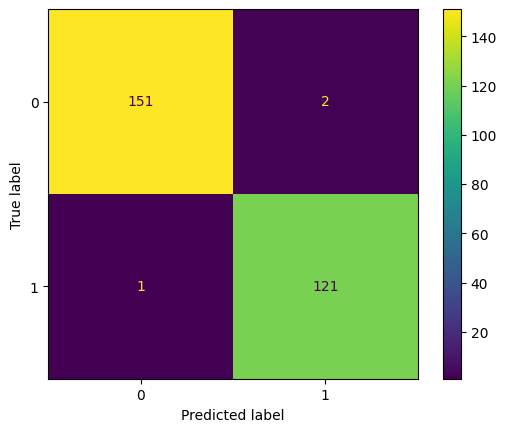

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = metrics.confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

disp.plot()
plt.show()

In [54]:
verdadeiro_positivo = cnf_matrix[0][0]
verdadeiro_negativo = cnf_matrix[1][1]

falso_positivo = cnf_matrix[0][1] # erro tipo 1
falso_negativo = cnf_matrix[1][0] # erro tipo 2

acertos = verdadeiro_positivo + verdadeiro_negativo
erros = falso_positivo + falso_negativo

print('Erros   : ', erros)
print('Acertos : ',acertos)
print('--------')
print('Porcentagem de acertos : ', acertos/(acertos+erros))

Erros   :  3
Acertos :  272
--------
Porcentagem de acertos :  0.9890909090909091


Consultando as probabilidades:

In [55]:
y_pred_prob = logreg.predict_proba(pd.DataFrame(df.drop('authentic', axis=1)))

p_autentica = []
p_falsa = []

for linha in y_pred_prob:
    p_autentica.append(linha[1]) # Probabilidade de ser autêntica
    p_falsa.append(linha[0]) # Probabilidade de ser falsa

df['p_autentica'] = p_autentica
df['p_falsa'] = p_falsa

df

,variance,skewness,kurtosis,entropy,authentic,p_autentica,p_falsa
0,3.62160,8.66610,-2.8073,-0.44699,0,6.522816e-08,1.000000
1,4.54590,8.16740,-2.4586,-1.46210,0,4.126875e-09,1.000000
2,3.86600,-2.63830,1.9242,0.10645,0,4.260585e-04,0.999574
3,3.45660,9.52280,-4.0112,-3.59440,0,3.253163e-07,1.000000
4,0.32924,-4.45520,4.5718,-0.98880,0,6.566482e-01,0.343352
...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,9.651743e-01,0.034826
1368,-1.38870,-4.87730,6.4774,0.34179,1,9.302521e-01,0.069748
1369,-3.75030,-13.45860,17.5932,-2.77710,1,6.886267e-01,0.311373
1370,-3.56370,-8.38270,12.3930,-1.28230,1,9.324450e-01,0.067555


Agora, vamos interpretar o modelo de Regressão Logística em relação à variável *variance*.

In [56]:
parametros = logreg.coef_ # Esse comando retorna os coeficientes da regressão logística
print(parametros)
print(parametros.shape)

[[-3.10572104 -1.75370037 -2.17354318  0.0063133 ]]
(1, 4)


*variance* é a primeira variável preditora do modelo. Então, ao coletar os parâmetros, ela também será a primeira nesse vetor. Para analisar o impacto do incremento de $\delta$ dessa métrica na predição da autenticidade da cédula, calculamos o exponencial de $\delta$ multiplicado por esse parâmetro. Veja abaixo o exemplo para o incremento de $0.5$ na *variance*:

In [57]:
np.exp(0.5*parametros[0,0])

0.21164170165318977

Ou seja, se a chance de uma determinada cédula ser classificada como autêntica era $0.6$ (por exemplo), uma outra cédula com as mesmas características com a exceção de que a métrica da variance é $0.5$ superior ($\delta = 0.5$), possui uma chance de ser classificada como autêntica igual a $\exp(0.5 * \beta_{variance}) * 0.6$. No exemplo acima:

In [58]:
np.exp(0.5*parametros[0,0])*0.6

0.12698502099191386

## Conclusão

1. Modelos de Regressão Logistica simples são bem definidos (determinísticos).
1. Funcionam para quaisquer dimensões.
1. Podem ser aplicados a quaisquer conjunto de dados, desde que a variável dependente seja dicotômica.
1. São muito empregados em problemas de classificação.

# Referência

Para consultar o referencial da implementação em Python da Regressão Logística, acesse [este link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

###**Exercício (só para treinar, não vale nota)**
Repita os dois modelos anteriores, mas deixando 20% dos dados para treinamento do modelo e 80% para realização de testes. Qual a nova porcentagem de acertos do modelo?